In [1]:
from fastai.vision import *

In [2]:
folder1 = 'long hair male'
url1 = 'long_hair_male.csv'

In [3]:
folder2 = 'short hair male'
url2 = 'short_hair_male.csv'

In [4]:
folder3 = 'long hair female'
url3 = 'long_hair_female.csv'

In [5]:
folder4 = 'short hair female'
url4 = 'short_hair_female.csv'

In [6]:
for i in [folder1,folder2, folder3, folder4]:
    path = Path('data/')
    dest = path/i
    dest.mkdir(parents=True, exist_ok=True)

In [7]:
classes = ['long hair male','short hair male','long hair female','short hair female']

In [8]:
download_images('long_hair_male.csv', 'data/long hair male/', max_pics=200)

In [9]:
download_images('short_hair_male.csv', 'data/short hair male/', max_pics=200)

In [10]:
download_images('long_hair_female.csv', 'data/long hair female/', max_pics=200)

Error https://www.scalsys.com/hairstyles/really-long-hairstyles/really-long-hairstyles_240240.jpg HTTPSConnectionPool(host='www.scalsys.com', port=443): Max retries exceeded with url: /hairstyles/really-long-hairstyles/really-long-hairstyles_240240.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))


In [11]:
download_images('short_hair_female.csv', 'data/short hair female/', max_pics=200)

Error https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/emmastoneshorthairstyle-1546948265.jpg HTTPSConnectionPool(host='hips.hearstapps.com', port=443): Read timed out. (read timeout=4)
Error https://hips.hearstapps.com/rbk.h-cdn.co/assets/16/44/1478024603-lily-collins.jpg HTTPSConnectionPool(host='hips.hearstapps.com', port=443): Read timed out. (read timeout=4)


In [12]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

long hair male


cannot identify image file <_io.BufferedReader name='data/male/long hair male/00000073.jpg'>
cannot identify image file <_io.BufferedReader name='data/male/long hair male/00000077.jpg'>
cannot identify image file <_io.BufferedReader name='data/male/long hair male/00000040.jpg'>
cannot identify image file <_io.BufferedReader name='data/male/long hair male/00000093.jpg'>
cannot identify image file <_io.BufferedReader name='data/male/long hair male/00000065.jpg'>
cannot identify image file <_io.BufferedReader name='data/male/long hair male/00000036.jpg'>
cannot identify image file <_io.BufferedReader name='data/male/long hair male/00000056.jpg'>
short hair male


cannot identify image file <_io.BufferedReader name='data/male/short hair male/00000045.jpg'>
cannot identify image file <_io.BufferedReader name='data/male/short hair male/00000088.jpg'>
cannot identify image file <_io.BufferedReader name='data/male/short hair male/00000062.jpg'>


In [15]:
path = Path('data/')

In [17]:
path.ls()

[PosixPath('data/long hair female'),
 PosixPath('data/short hair female'),
 PosixPath('data/long hair male'),
 PosixPath('data/short hair male')]

In [18]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [19]:
data.classes

['long hair female', 'long hair male', 'short hair female', 'short hair male']

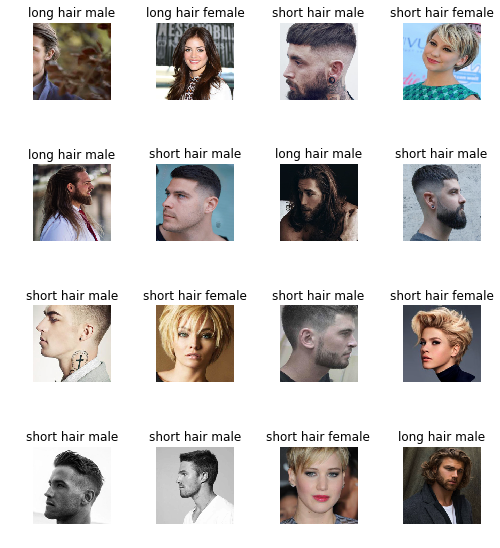

In [20]:
data.show_batch(rows=4, figsize=(7,8))

In [21]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['long hair female',
  'long hair male',
  'short hair female',
  'short hair male'],
 4,
 308,
 76)

In [22]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/felipe/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [07:50<00:00, 185371.66it/s]


In [24]:
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,error_rate,time
0,0.236359,0.397640,0.171053,00:02
1,0.291494,0.396730,0.157895,00:02
2,0.250036,0.401205,0.157895,00:02
3,0.247244,0.391167,0.144737,00:02
4,0.237669,0.400687,0.144737,00:02
5,0.212547,0.398019,0.131579,00:02
6,0.205122,0.370273,0.131579,00:02
7,0.191452,0.345608,0.105263,00:02
8,0.179464,0.339713,0.118421,00:02
9,0.166582,0.339975,0.118421,00:02


In [25]:
learn.save('stage-1')

In [26]:
learn.unfreeze()

In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


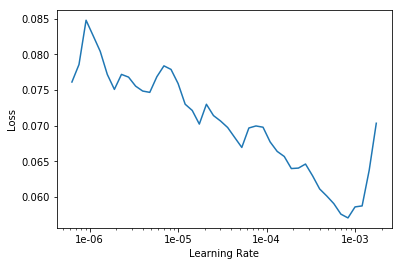

In [28]:
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(5, max_lr=slice(3e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.064121,0.374640,0.118421,00:02
1,0.097042,0.983314,0.171053,00:02
2,0.147809,0.574578,0.171053,00:02
3,0.147952,0.848959,0.197368,00:02
4,0.126711,0.686369,0.131579,00:02


In [30]:
learn.save('stage-2')

In [31]:
learn.load('stage-2');

In [32]:
interp = ClassificationInterpretation.from_learner(learn)

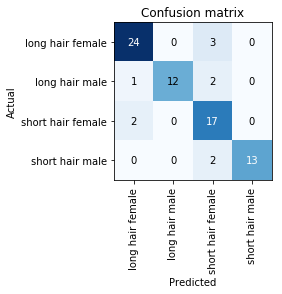

In [33]:
interp.plot_confusion_matrix()

In [34]:
from fastai.widgets import *

In [36]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [38]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');


In [39]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [42]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [43]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [44]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

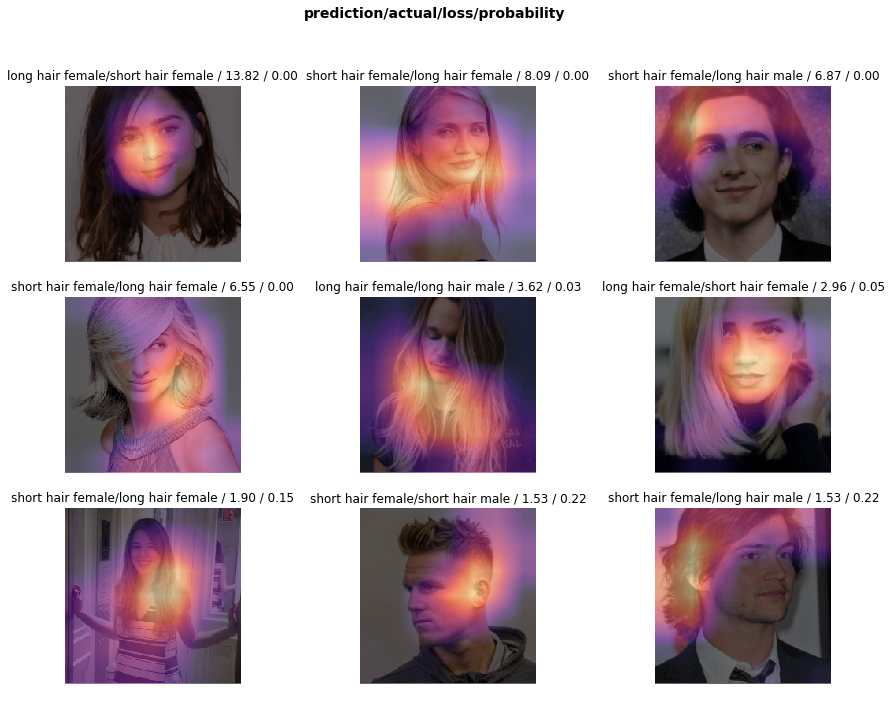

In [45]:
interp.plot_top_losses(9, figsize=(15,11))

In [46]:
interp.most_confused(min_val=2)

[('long hair female', 'short hair female', 3),
 ('long hair male', 'short hair female', 2),
 ('short hair female', 'long hair female', 2),
 ('short hair male', 'short hair female', 2)]